In [1]:
import os, sys
import numpy as np
import pandas as pd

things_root = '/user_data/mmhender/stimuli/things/'
project_root = '/user_data/mmhender/featsynth/'

sys.path.append(project_root)

from code_utils import dropbox_utils, expt_utils
token_path = os.path.join(project_root, 'tokens/dbx_token.txt')
dbx = dropbox_utils.init_dropbox(token_path)

expt_name = 'pilot2'

In [3]:
# dbx.files_list_folder('/images_v1/')
# dbx.files_list_folder('/images/')

In [5]:
dbxpath = '/images_v1/arugula_08s/orig.png'
# dbxpath = '/images/airbag_01b/orig.png'
dropbox_utils.get_shared_url(dbxpath, dbx)

'https://dl.dropboxusercontent.com/s/99f3fzzwis4ca43/orig.png?dl=0'

In [6]:
dbx.files_list_folder('/data/')

ApiError: ApiError('d9edde977bf148e88271ad00d44c8230', ListFolderError('path', LookupError('not_found', None)))

In [6]:
from make_expt_designs import make_pilot2

In [7]:
make_pilot2.make_trial_info()

making trial info for counterbalance cond 0 of 2
['bird', 'drink', 'fruit', 'body_part', 'home_decor', 'medical_equipment', 'weapon', 'vehicle', 'electronic_device', 'sports_equipment']
proc trial 0 of 1000
/images_v1/peacock_01b/orig.png
/images_v1/peacock_02s/orig.png
/images_v1/peacock_03s/grid5_1x1_upto_pool1.png
/images_v1/peacock_04s/grid5_1x1_upto_pool1.png
/images_v1/peacock_05s/grid5_1x1_upto_pool2.png
/images_v1/peacock_06s/grid5_1x1_upto_pool2.png
/images_v1/peacock_07s/grid5_1x1_upto_pool3.png


KeyboardInterrupt: 

In [7]:
ti = pd.read_csv('/user_data/mmhender/featsynth/expt_design/pilot2/trial_info_counterbal2.csv')

In [8]:
ti

,trial_num_overall,categ_ind,concept_ind,super_name,basic_name,ex_num,image_type_num,image_type,image_name,dropbox_url,target_present,cue_level_num,cue_level,cue_name,run_number,trial_in_run
0,651.0,6.0,5.0,furniture,beanbag,1.0,0.0,orig,beanbag_02s/orig.png,0.0,True,1.0,super,furniture,1,1
1,452.0,4.0,5.0,plant,bamboo,2.0,1.0,pool1,bamboo_03s/grid5_1x1_upto_pool1.png,0.0,True,0.0,basic,bamboo,1,2
2,149.0,1.0,4.0,dessert,whipped_cream,9.0,4.0,pool4,whipped_cream_10s/grid5_1x1_upto_pool4.png,0.0,False,1.0,super,toy,1,3
3,425.0,4.0,2.0,plant,seaweed,5.0,2.0,pool2,seaweed_06s/grid5_1x1_upto_pool2.png,0.0,False,1.0,super,dessert,1,4
4,870.0,8.0,7.0,toy,lego,0.0,0.0,orig,lego_01b/orig.png,0.0,False,0.0,basic,rocking_horse,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,71.0,0.0,7.0,insect,dragonfly,1.0,0.0,orig,dragonfly_02s/orig.png,0.0,True,1.0,super,insect,10,96
996,411.0,4.0,1.0,plant,fern,1.0,0.0,orig,fern_02n/orig.png,0.0,True,1.0,super,plant,10,97
997,673.0,6.0,7.0,furniture,sofa_bed,3.0,1.0,pool1,sofa_bed_04s/grid5_1x1_upto_pool1.png,0.0,False,1.0,super,vegetable,10,98
998,943.0,9.0,4.0,kitchen_tool,tongs,3.0,1.0,pool1,tongs_04s/grid5_1x1_upto_pool1.png,0.0,True,1.0,super,kitchen_tool,10,99


In [156]:
def choose_image_subsets():
    
    concepts_filename = os.path.join(things_root, 'concepts_use.npy')
    concepts_use = np.load(concepts_filename,allow_pickle=True).item()
    categ_names = concepts_use['categ_names']
    concept_names = concepts_use['concept_names_subsample']
    image_names = concepts_use['image_names']
    
    concepts_all = np.concatenate(concept_names)
    categ_all = np.repeat(categ_names, [len(cc) for cc in concept_names])

    n_categ_use_each = 10;
    n_concepts_use_each = 10;

    n_ex_use = 10;
    assert(np.mod(n_ex_use,10)==0)

    # randomly selecting the subset of categories and concepts that will be used here
    rndseed = 676788
    np.random.seed(rndseed)

    # i am manually assigning the categories that are animals, food/drink, 
    # or human-related, so that they are balanced in the two sets
    categ_set1 = ['bird', 'drink', 'fruit', 'body_part']
    categ_set2 = ['insect','dessert', 'vegetable', 'clothing']
    # then randomly assign the remaining categories
    categ_shuffled = np.array(categ_names)[np.random.permutation(len(categ_names))]
    categ_shuffled = [c for c in categ_shuffled if (c not in categ_set1 and c not in categ_set2)]
    n_append = n_categ_use_each - len(categ_set1)
    categ_set1 += categ_shuffled[0:n_append]
    categ_set2 += categ_shuffled[n_append:2*n_append]

    categ_sets = [categ_set1, categ_set2]
    concept_sets = []
    image_name_sets = []

    for categ_use in categ_sets:

        categ_inds_use = [np.where(np.array(categ_names)==c)[0][0] for c in categ_use]

        # randomly select which individual concepts and which exemplars to use here
        concepts_use = [np.random.choice(concept_names[ca], n_concepts_use_each, replace=False) for ca in categ_inds_use]

        # always use the first 10 exemplars, since these are the ones we have made synths for.
        image_names_use = [[image_names[co][0:n_ex_use] for co in conc] \
                           for conc in concepts_use]

        concept_sets += [concepts_use]
        image_name_sets += [image_names_use]

    return categ_sets, concept_sets, image_name_sets

In [67]:
rndseed = None

# def make_trial_info(rndseed = None):

# decide which images we will use
categ_sets, concept_sets, image_name_sets = choose_image_subsets()
n_counterbalance_conds = len(categ_sets)

# figure out trial conditions/counts
n_categ_use = len(categ_sets[0])
n_concepts_use = len(concept_sets[0][0])
n_ex_use = len(image_name_sets[0][0][0])

# image types are original or "synth" from different DNN layers
n_layers=4
n_image_types = n_layers+1 

cue_levels = ['basic', 'super']
n_cue_levels = len(cue_levels); # basic or superordinate

n_trials_per_concept = n_image_types * n_cue_levels
assert(n_trials_per_concept==n_ex_use)

n_trials_total = n_categ_use * n_concepts_use * n_trials_per_concept

n_runs = 10;
assert(np.mod(n_trials_total, n_runs)==0)
n_trials_per_run = int(n_trials_total/n_runs);

In [131]:
len(concept_sets[0])

10

In [30]:
stimuli_folder = 'images_v1'


In [31]:
rndseed = 567677
np.random.seed(rndseed)

cb = 0;

# for cb in range(n_counterbalance_conds):

print('making trial info for counterbalance cond %d of %d'%(cb, n_counterbalance_conds))

categ_use = categ_sets[cb]
print(categ_use)
concepts_use = concept_sets[cb]
image_names_use = image_name_sets[cb]

trial_info = pd.DataFrame({'trial_num_overall': np.zeros((n_trials_total,)), 
                           'categ_ind': np.zeros((n_trials_total,)),
                          'concept_ind': np.zeros((n_trials_total,)),
                          'super_name': np.zeros((n_trials_total,)),
                          'basic_name': np.zeros((n_trials_total,)),
                          'ex_num': np.zeros((n_trials_total,)),
                          'image_type_num': np.zeros((n_trials_total,)),
                          'image_type': np.zeros((n_trials_total,)),
                          'image_name': np.zeros((n_trials_total,)),
                          'dropbox_url': np.zeros((n_trials_total,)),
                          'target_present': np.zeros((n_trials_total,)),
                          'cue_level_num': np.zeros((n_trials_total,)),
                          'cue_level': np.zeros((n_trials_total,)),
                          'cue_name': np.zeros((n_trials_total,)),
                          })

image_type_names = ['orig', 'pool1','pool2','pool3','pool4']

tt=-1
for ca in range(n_categ_use):
    
    xx = -1
    
    for co in range(n_concepts_use):

        ex = -1
        
        for typ in range(n_image_types):
            for cue in range(n_cue_levels):

                tt+=1
                if np.mod(tt,100)==0:
                    print('proc trial %d of %d'%(tt, n_trials_total))

                trial_info['trial_num_overall'].iloc[tt] = tt
                trial_info['categ_ind'].iloc[tt] = ca
                trial_info['concept_ind'].iloc[tt] = co
                trial_info['super_name'].iloc[tt] = categ_use[ca]
                trial_info['basic_name'].iloc[tt] = concepts_use[ca][co]

                trial_info['image_type_num'].iloc[tt] = typ
                trial_info['image_type'].iloc[tt] = image_type_names[typ]
                trial_info['cue_level_num'].iloc[tt] = cue
                trial_info['cue_level'].iloc[tt] = cue_levels[cue]

                ex += 1
                trial_info['ex_num'].iloc[tt] = ex

                name_raw = image_names_use[ca][co][ex].split('.jpg')[0]

                if image_type_names[typ]=='orig':

                    trial_info['image_name'].iloc[tt] = os.path.join(name_raw, 'orig.png')
                    dbxpath = os.path.join(stimuli_folder, name_raw, 'orig.png')

                else:

                    trial_info['image_name'].iloc[tt] = os.path.join(name_raw, \
                                                                     'grid5_1x1_upto_%s.png'%\
                                                                     (image_type_names[typ]))
                    dbxpath = os.path.join(stimuli_folder,name_raw,\
                                           'grid5_1x1_upto_%s.png'%image_type_names[typ])

                # print(dbxpath)
                # trial_info['dropbox_url'].iloc[tt] = dropbox_utils.get_shared_url(dbxpath, dbx)
                
                xx += 1;
                # print(ex, xx, np.floor(xx/2))
                   
                # determining the target present-absent based on which concept it is
                # (this is not perfectly counter-balanced, but is balanced across all concepts)
                # if np.mod(co,2)==0:
                if np.mod(np.floor(xx/2),2)==0:
                    trial_info['target_present'].iloc[tt] = (cue==0)
                else:
                    trial_info['target_present'].iloc[tt] = (cue==1)
                    
        if np.mod(co,2)==1:
            xx = -1     
            

making trial info for counterbalance cond 0 of 2
['bird', 'drink', 'fruit', 'body_part', 'home_decor', 'medical_equipment', 'weapon', 'vehicle', 'electronic_device', 'sports_equipment']
proc trial 0 of 1000
proc trial 100 of 1000
proc trial 200 of 1000
proc trial 300 of 1000
proc trial 400 of 1000
proc trial 500 of 1000
proc trial 600 of 1000
proc trial 700 of 1000
proc trial 800 of 1000
proc trial 900 of 1000


In [124]:
from itertools import permutations

def shuffle_nosame(sequence, rndseed = None):
    
    """
    Shuffle a list pseudo-randomly, making sure that no element has the same 
    value in the new and old list.
    All list values must be unique.
    """
    
    unique_vals, uncounts = np.unique(sequence, return_counts=True)
    assert(len(unique_vals)==len(sequence))
    n_vals = len(sequence)
    
    if rndseed is not None:
        np.random.seed(rndseed)
        
    if np.mod(n_vals, 2)==0:
        # for even number, can use this algorithm
        new_sequence = swap_rand_pairs(sequence)
    elif n_vals<=7:
        n_total = len(sequence)
        # list all the ways to randomly permute groups of elements without having any in 
        # their original position.
        all_perms = list(permutations(np.arange(n_vals)))
        good_perms = [perm for perm in all_perms if np.all(np.array(perm)!=(np.arange(n_vals)))]
        # pick at random one of the orders that works
        perm_order = np.array(good_perms[np.random.choice(np.arange(len(good_perms)))])
        new_sequence = sequence[perm_order]
    else:
        # split in half and recurse
        rand_order = np.random.permutation(n_vals)
        groups = (rand_order<np.floor(n_vals/2)).astype(int)
        new_sequence = np.zeros(np.shape(sequence), sequence.dtype)
        for gg in [0,1]:
            inds = groups==gg
            new_sequence[inds] = shuffle_nosame(sequence[inds])
     
    assert(not np.any(sequence==new_sequence))
    assert(np.all(np.unique(sequence)==np.unique(new_sequence)))
    
    return new_sequence
    

In [150]:
import warnings
warnings.filterwarnings('ignore')

print('prepping cue names')
# decide what name to use to "cue" each trial, based on which level they are being cued at
# (these are all "correct names"; some of them get changed to incorrect in the next step)
trial_info['cue_name'] = trial_info['super_name']
trial_info['cue_name'][trial_info['cue_level']=='basic'] = \
    trial_info['basic_name'][trial_info['cue_level']=='basic']

# Assign incorrect names to all the basic-level target-absent trials
# always swapping basic-level names across trials with same superordinate 
# level name, and same in all other attributes
lev = 'basic'

for ca in range(n_categ_use):
    for typ in range(n_image_types):

        group = (trial_info['target_present']==False) & \
            (trial_info['categ_ind']==ca) & \
            (trial_info['cue_level']==lev) 
        
        basic_name_list = np.array(concepts_use[ca])
        
        actual_basic_inds = np.array(trial_info['concept_ind'][group])
        actual_basic_names = np.array(trial_info['basic_name'][group])
        
        # print(actual_basic_names)
        
        sequence = actual_basic_inds
        unique_vals, uncounts = np.unique(sequence, return_counts=True)

        subgroups = [[] for ii in range(np.max(uncounts))]
        for vi, vv in enumerate(unique_vals):
            inds = np.where(sequence==vv)[0]
            assert(len(inds)==uncounts[vi])
            for ii, ind in enumerate(inds):
                subgroups[ii] += [ind]

        incorrect_basic_inds = np.zeros(np.shape(actual_basic_inds))
        incorrect_basic_names = np.zeros(np.shape(actual_basic_names))
        
        for subgroup in subgroups:
            
            inds_real = actual_basic_inds[subgroup]
            
            # print(actual_basic_names[subgroup])
            # print(inds_real)
            
            shuff_basic_inds = shuffle_nosame(inds_real)

            # print(shuff_basic_inds)
            incorrect_basic_inds[subgroup] = shuff_basic_inds

    
        # print(basic_name_list[incorrect_basic_inds.astype(int)])
        trial_info['cue_name'].iloc[group] = basic_name_list[incorrect_basic_inds.astype(int)]

prepping cue names


In [152]:
# Assign incorrect names to all the superord-level target-absent trials
lev = 'super'

for co in range(n_concepts_use):
    for typ in range(n_image_types):
        for ex in range(n_ex_use):

            group = (trial_info['target_present']==False) & \
                    (trial_info['concept_ind']==co) & \
                    (trial_info['cue_level']==lev)
                   
            super_name_list = np.array(categ_use)
            actual_super_inds = np.array(trial_info['categ_ind'][group])
            actual_super_names = np.array(trial_info['super_name'][group])

            # print(actual_super_names)

            sequence = actual_super_inds
            unique_vals, uncounts = np.unique(sequence, return_counts=True)

            subgroups = [[] for ii in range(np.max(uncounts))]
            for vi, vv in enumerate(unique_vals):
                inds = np.where(sequence==vv)[0]
                assert(len(inds)==uncounts[vi])
                for ii, ind in enumerate(inds):
                    subgroups[ii] += [ind]

            incorrect_super_inds = np.zeros(np.shape(actual_super_inds))
            incorrect_super_names = np.zeros(np.shape(actual_super_names))

            for subgroup in subgroups:

                inds_real = actual_super_inds[subgroup]

                # print(actual_super_names[subgroup])
                # print(inds_real)

                shuff_super_inds = shuffle_nosame(inds_real)

                # print(shuff_super_inds)
                incorrect_super_inds[subgroup] = shuff_super_inds


            # print(super_name_list[incorrect_super_inds.astype(int)])
            trial_info['cue_name'].iloc[group] = super_name_list[incorrect_super_inds.astype(int)]

In [174]:
def check_trial_info(ti):

    # make sure that the target present/target absent trials line up correctly
    # (cue name should match actual name for target present, and should 
    # always mismatch for target absent)

    inds_check = (ti['cue_level']=='basic') & (ti['target_present']==True)
    assert(np.all(ti['cue_name'][inds_check]==ti['basic_name'][inds_check]))
    inds_check = (ti['cue_level']=='basic') & (ti['target_present']==False)
    assert(np.all(ti['cue_name'][inds_check]!=ti['basic_name'][inds_check]))

    inds_check = (ti['cue_level']=='super') & (ti['target_present']==True)
    assert(np.all(ti['cue_name'][inds_check]==ti['super_name'][inds_check]))
    inds_check = (ti['cue_level']=='super') & (ti['target_present']==False)
    assert(np.all(ti['cue_name'][inds_check]!=ti['super_name'][inds_check]))

    # check to make sure individual attributes are distributed evenly across trials 
    n_trials_total = ti.shape[0]

    attr_check_even = ['super_name', 'basic_name', 'ex_num', 'image_type_num', 'target_present', 'cue_level']
    for attr in attr_check_even:

        # should be an equal number of each thing 
        un, counts = np.unique(ti[attr], return_counts=True)
        assert(np.all(counts==n_trials_total/len(un)))

    # check the counterbalancing over multiple attributes

    # there should be an equal number of trials in each of the combinations of these 
    # different attribute "levels". for example each combination of category/image type. 

    attr_balanced = [ti['categ_ind'], ti['concept_ind'], ti['image_type_num'], ti['cue_level']]
    attr_balanced_inds = np.array([np.unique(attr, return_inverse=True)[1] for attr in attr_balanced]).T

    n_levels_each = [len(np.unique(attr)) for attr in attr_balanced]
    n_combs_expected = np.prod(n_levels_each)
    n_repeats_expected = n_trials_total/n_combs_expected

    un_rows, counts = np.unique(attr_balanced_inds,axis=0, return_counts=True)

    assert(un_rows.shape[0]==n_combs_expected)
    assert(np.all(counts==n_repeats_expected))
    
    attr_balanced = [ti['categ_ind'], ti['image_type_num'], ti['cue_level'], ti['target_present']]
    attr_balanced_inds = np.array([np.unique(attr, return_inverse=True)[1] for attr in attr_balanced]).T

    n_levels_each = [len(np.unique(attr)) for attr in attr_balanced]
    n_combs_expected = np.prod(n_levels_each)
    n_repeats_expected = n_trials_total/n_combs_expected

    un_rows, counts = np.unique(attr_balanced_inds,axis=0, return_counts=True)

    assert(un_rows.shape[0]==n_combs_expected)
    assert(np.all(counts==n_repeats_expected))
    
    attr_balanced = [ti['categ_ind'], ti['concept_ind'], ti['image_type_num'], ti['target_present']]
    attr_balanced_inds = np.array([np.unique(attr, return_inverse=True)[1] for attr in attr_balanced]).T

    n_levels_each = [len(np.unique(attr)) for attr in attr_balanced]
    n_combs_expected = np.prod(n_levels_each)
    n_repeats_expected = n_trials_total/n_combs_expected

    un_rows, counts = np.unique(attr_balanced_inds,axis=0, return_counts=True)

    assert(un_rows.shape[0]==n_combs_expected)
    assert(np.all(counts==n_repeats_expected))

In [176]:
# shuffle the order of everything together.
shuff_order = np.random.permutation(np.arange(n_trials_total))
trial_info = trial_info.iloc[shuff_order]

# finally, assign the run numbers for each trial (these are the only non-shuffled columns).
trial_info['run_number'] = np.repeat(np.arange(n_runs), n_trials_per_run) + 1
trial_info['trial_in_run'] = np.tile(np.arange(n_trials_per_run), [n_runs,]) + 1

# double check everything
print('checking trial info')
check_trial_info(trial_info)


checking trial info


In [173]:
np.sum((trial_info['basic_name']=='peacock') & (trial_info['target_present']==True))

5

In [154]:
trial_info

,trial_num_overall,categ_ind,concept_ind,super_name,basic_name,ex_num,image_type_num,image_type,image_name,dropbox_url,target_present,cue_level_num,cue_level,cue_name
0,0.0,0.0,0.0,bird,peacock,0.0,0.0,orig,peacock_01b/orig.png,0.0,True,0.0,basic,peacock
1,1.0,0.0,0.0,bird,peacock,1.0,0.0,orig,peacock_02s/orig.png,0.0,False,1.0,super,vehicle
2,2.0,0.0,0.0,bird,peacock,2.0,1.0,pool1,peacock_03s/grid5_1x1_upto_pool1.png,0.0,False,0.0,basic,eagle
3,3.0,0.0,0.0,bird,peacock,3.0,1.0,pool1,peacock_04s/grid5_1x1_upto_pool1.png,0.0,True,1.0,super,bird
4,4.0,0.0,0.0,bird,peacock,4.0,2.0,pool2,peacock_05s/grid5_1x1_upto_pool2.png,0.0,True,0.0,basic,peacock
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,995.0,9.0,9.0,sports_equipment,trampoline,5.0,2.0,pool2,trampoline_06s/grid5_1x1_upto_pool2.png,0.0,True,1.0,super,sports_equipment
996,996.0,9.0,9.0,sports_equipment,trampoline,6.0,3.0,pool3,trampoline_07s/grid5_1x1_upto_pool3.png,0.0,True,0.0,basic,trampoline
997,997.0,9.0,9.0,sports_equipment,trampoline,7.0,3.0,pool3,trampoline_08s/grid5_1x1_upto_pool3.png,0.0,False,1.0,super,vehicle
998,998.0,9.0,9.0,sports_equipment,trampoline,8.0,4.0,pool4,trampoline_09s/grid5_1x1_upto_pool4.png,0.0,False,0.0,basic,hockey_stick


In [143]:
incorrect_basic_inds.astype(int)

array([9, 7, 6, 4, 5, 8, 6, 7, 8, 7, 5, 1, 4, 9, 3, 1, 2, 3, 0, 9, 2, 3,
       0, 5, 1])

In [139]:
basic_name_list[incorrect_basic_inds.astype(int)]

array([3, 2, 9, 6, 7, 8, 0, 0, 9, 5, 5, 8, 4, 7, 9, 7, 1, 6, 5, 1, 2, 4,
       1, 3, 3])

In [138]:
incorrect_basic_inds.astype(int)

array([3, 2, 9, 6, 7, 8, 0, 0, 9, 5, 5, 8, 4, 7, 9, 7, 1, 6, 5, 1, 2, 4,
       1, 3, 3])

In [137]:
group

0      False
1      False
2       True
3      False
4      False
       ...  
995    False
996    False
997    False
998    False
999    False
Length: 1000, dtype: bool

In [133]:
incorrect_basic_inds

array([3., 9., 9., 5., 3., 4., 7., 0., 4., 7., 2., 3., 7., 1., 9., 8., 8.,
       5., 2., 5., 6., 6., 1., 0., 1.])

In [127]:
actual_basic_inds

array([0., 0., 1., 1., 1., 2., 2., 3., 3., 3., 4., 4., 5., 5., 5., 6., 6.,
       7., 7., 7., 8., 8., 9., 9., 9.])

In [128]:
actual_basic_names

array(['rollerskate', 'rollerskate', 'hockey_stick', 'hockey_stick',
       'hockey_stick', 'iceskate', 'iceskate', 'cleat', 'cleat', 'cleat',
       'racket', 'racket', 'dartboard', 'dartboard', 'dartboard',
       'rollerblade', 'rollerblade', 'boxing_gloves', 'boxing_gloves',
       'boxing_gloves', 'bobsled', 'bobsled', 'trampoline', 'trampoline',
       'trampoline'], dtype=object)

In [77]:
sequence = actual_basic_inds[subgroup]
sequence

array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.])

In [81]:
sequence == swap_rand_pairs(sequence)

array([False, False, False, False, False, False, False, False, False,
       False])

In [68]:
actual_basic_names

array(['peacock', 'peacock', 'eagle', 'eagle', 'eagle', 'pelican',
       'pelican', 'duck', 'duck', 'duck', 'ostrich', 'ostrich', 'toucan',
       'toucan', 'toucan', 'chick', 'chick', 'vulture', 'vulture',
       'vulture', 'parrot', 'parrot', 'pigeon', 'pigeon', 'pigeon'],
      dtype=object)

In [56]:
sequence = actual_basic_inds


n_vals = len(unique_vals)
# assert(np.all(uncounts==n_each))

n_total = len(sequence)

In [58]:
uncounts

array([2, 3, 2, 3, 2, 3, 2, 3, 2, 3])

In [64]:
[sequence[gg] for gg in groups]

[array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.]),
 array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.]),
 array([1., 3., 5., 7., 9.])]

In [54]:
# list all the ways to randomly permute groups of elements without having any in 
# their original position.
all_perms = list(permutations(np.arange(n_vals)))
good_perms = [perm for perm in all_perms if np.all(np.array(perm)!=(np.arange(n_vals)))]

# sort to make it easy to find the common groups
order2sort, order2reverse = invertible_sort(sequence)
sorted_sequence = sequence[order2sort]

new_sequence = np.zeros(np.shape(sorted_sequence),dtype=sorted_sequence.dtype)

n_groups = n_each
for gg in range(n_groups):

    # gather N elements at a time, one of each value. 
    inds = gg+np.arange(0,n_total,n_each)
    vals = sorted_sequence[inds]
    assert(np.all(vals==unique_vals))

    # pick at random one of the orders that works
    perm_order = np.array(good_perms[np.random.choice(np.arange(len(good_perms)))])
    new_sequence[inds] = vals[perm_order]

new_sequence_unsorted = new_sequence[order2reverse]

array([0., 0., 1., 1., 1., 2., 2., 3., 3., 3., 4., 4., 5., 5., 5., 6., 6.,
       7., 7., 7., 8., 8., 9., 9., 9.])

In [41]:
actual_basic_inds

array([1., 3., 5., 7., 9.])

In [32]:
inds = (trial_info['super_name']=='sports_equipment') & \
        ((trial_info['basic_name']=='rollerskate') | (trial_info['basic_name']=='hockey_stick')) 

# inds = (trial_info['super_name']=='sports_equipment') & \
#         (trial_info['cue_level']=='basic') & \
#         (trial_info['image_type']=='orig')

trial_info[inds]

,trial_num_overall,categ_ind,concept_ind,super_name,basic_name,ex_num,image_type_num,image_type,image_name,dropbox_url,target_present,cue_level_num,cue_level,cue_name
900,900.0,9.0,0.0,sports_equipment,rollerskate,0.0,0.0,orig,rollerskate_01b/orig.png,0.0,True,0.0,basic,0.0
901,901.0,9.0,0.0,sports_equipment,rollerskate,1.0,0.0,orig,rollerskate_02s/orig.png,0.0,False,1.0,super,0.0
902,902.0,9.0,0.0,sports_equipment,rollerskate,2.0,1.0,pool1,rollerskate_03s/grid5_1x1_upto_pool1.png,0.0,False,0.0,basic,0.0
903,903.0,9.0,0.0,sports_equipment,rollerskate,3.0,1.0,pool1,rollerskate_04s/grid5_1x1_upto_pool1.png,0.0,True,1.0,super,0.0
904,904.0,9.0,0.0,sports_equipment,rollerskate,4.0,2.0,pool2,rollerskate_05s/grid5_1x1_upto_pool2.png,0.0,True,0.0,basic,0.0
905,905.0,9.0,0.0,sports_equipment,rollerskate,5.0,2.0,pool2,rollerskate_06s/grid5_1x1_upto_pool2.png,0.0,False,1.0,super,0.0
906,906.0,9.0,0.0,sports_equipment,rollerskate,6.0,3.0,pool3,rollerskate_07s/grid5_1x1_upto_pool3.png,0.0,False,0.0,basic,0.0
907,907.0,9.0,0.0,sports_equipment,rollerskate,7.0,3.0,pool3,rollerskate_08s/grid5_1x1_upto_pool3.png,0.0,True,1.0,super,0.0
908,908.0,9.0,0.0,sports_equipment,rollerskate,8.0,4.0,pool4,rollerskate_09s/grid5_1x1_upto_pool4.png,0.0,True,0.0,basic,0.0
909,909.0,9.0,0.0,sports_equipment,rollerskate,9.0,4.0,pool4,rollerskate_10s/grid5_1x1_upto_pool4.png,0.0,False,1.0,super,0.0


In [16]:
n_concepts_use = 10;
n_trials_per_concept = 20;
n_trials_each_categ = n_concepts_use*n_trials_per_concept

n_image_types = 5;
n_resp_types = 4;

n_trials_per_resp_type = int(n_trials_each_categ/n_resp_types)
n_trials_per_image_type = int(n_trials_each_categ/n_image_types)

In [8]:
5*4

20

In [276]:
n_trials_per_resp_type

20

In [248]:
n_trials

80

In [17]:
conc_inds = np.tile(np.arange(n_concepts_use), n_trials_per_concept)[:,None]
resp_type_inds = np.repeat(np.arange(n_resp_types), n_trials_per_resp_type)[:,None]
image_type_inds = np.repeat(np.arange(n_image_types), n_trials_per_image_type)[:,None]

seq = np.concatenate([conc_inds, resp_type_inds, image_type_inds], axis=1)
seq.shape

(200, 3)

In [18]:
np.unique(seq[:,0:2], axis=0).shape

(40, 2)

In [19]:
un, counts = np.unique(seq[:,0:2], axis=0, return_counts=True)
counts

array([5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5])

In [20]:
un, counts = np.unique(seq[:,1:], axis=0, return_counts=True)
counts

array([40, 10, 30, 20, 20, 30, 10, 40])

In [21]:
un

array([[0, 0],
       [0, 1],
       [1, 1],
       [1, 2],
       [2, 2],
       [2, 3],
       [3, 3],
       [3, 4]])

In [251]:
np.tile(np.arange(n_image_types), n_resp_types)

array([0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4])

In [254]:
np.shape(np.unique(seq, axis=1))

(80, 3)

In [272]:
seq[seq[:,0]==9,:]

array([[9, 0, 0],
       [9, 0, 1],
       [9, 1, 1],
       [9, 1, 2],
       [9, 2, 3],
       [9, 2, 3],
       [9, 3, 4],
       [9, 3, 4]])

In [222]:
# inds = (trial_info['super_name']=='sports_equipment') & \
#         (trial_info['basic_name']=='rollerskate')

inds = (trial_info['super_name']=='sports_equipment') & \
        (trial_info['cue_level']=='basic') & \
        (trial_info['target_present']==False)

trial_info[inds]

,trial_num_overall,categ_ind,concept_ind,super_name,basic_name,ex_num,image_type_num,image_type,image_name,dropbox_url,target_present,cue_level_num,cue_level,cue_name
902,902.0,9.0,0.0,sports_equipment,rollerskate,2.0,1.0,pool1,rollerskate_03s/grid5_1x1_upto_pool1.png,0.0,False,0.0,basic,0.0
906,906.0,9.0,0.0,sports_equipment,rollerskate,6.0,3.0,pool3,rollerskate_07s/grid5_1x1_upto_pool3.png,0.0,False,0.0,basic,0.0
910,910.0,9.0,1.0,sports_equipment,hockey_stick,0.0,0.0,orig,hockey_stick_01b/orig.png,0.0,False,0.0,basic,0.0
914,914.0,9.0,1.0,sports_equipment,hockey_stick,4.0,2.0,pool2,hockey_stick_05s/grid5_1x1_upto_pool2.png,0.0,False,0.0,basic,0.0
918,918.0,9.0,1.0,sports_equipment,hockey_stick,8.0,4.0,pool4,hockey_stick_09s/grid5_1x1_upto_pool4.png,0.0,False,0.0,basic,0.0
922,922.0,9.0,2.0,sports_equipment,iceskate,2.0,1.0,pool1,iceskate_03s/grid5_1x1_upto_pool1.png,0.0,False,0.0,basic,0.0
926,926.0,9.0,2.0,sports_equipment,iceskate,6.0,3.0,pool3,iceskate_07s/grid5_1x1_upto_pool3.png,0.0,False,0.0,basic,0.0
930,930.0,9.0,3.0,sports_equipment,cleat,0.0,0.0,orig,cleat_01b/orig.png,0.0,False,0.0,basic,0.0
934,934.0,9.0,3.0,sports_equipment,cleat,4.0,2.0,pool2,cleat_05s/grid5_1x1_upto_pool2.png,0.0,False,0.0,basic,0.0
938,938.0,9.0,3.0,sports_equipment,cleat,8.0,4.0,pool4,cleat_09s/grid5_1x1_upto_pool4.png,0.0,False,0.0,basic,0.0


In [226]:
actual_basic_inds

array([1., 3., 5., 7., 9.])

In [227]:
incorrect_basic_inds

array([7, 1, 9, 3, 5])

In [220]:
# inds = (trial_info['super_name']=='sports_equipment') & \
#         (trial_info['basic_name']=='rollerskate')

inds = (trial_info['super_name']=='sports_equipment') & \
        (trial_info['cue_level']=='basic') & \
        (trial_info['image_type']=='pool1')

trial_info[inds]

,trial_num_overall,categ_ind,concept_ind,super_name,basic_name,ex_num,image_type_num,image_type,image_name,dropbox_url,target_present,cue_level_num,cue_level,cue_name
902,902.0,9.0,0.0,sports_equipment,rollerskate,2.0,1.0,pool1,rollerskate_03s/grid5_1x1_upto_pool1.png,0.0,False,0.0,basic,0.0
912,912.0,9.0,1.0,sports_equipment,hockey_stick,2.0,1.0,pool1,hockey_stick_03s/grid5_1x1_upto_pool1.png,0.0,True,0.0,basic,0.0
922,922.0,9.0,2.0,sports_equipment,iceskate,2.0,1.0,pool1,iceskate_03s/grid5_1x1_upto_pool1.png,0.0,False,0.0,basic,0.0
932,932.0,9.0,3.0,sports_equipment,cleat,2.0,1.0,pool1,cleat_03s/grid5_1x1_upto_pool1.png,0.0,True,0.0,basic,0.0
942,942.0,9.0,4.0,sports_equipment,racket,2.0,1.0,pool1,racket_03s/grid5_1x1_upto_pool1.png,0.0,False,0.0,basic,0.0
952,952.0,9.0,5.0,sports_equipment,dartboard,2.0,1.0,pool1,dartboard_03s/grid5_1x1_upto_pool1.png,0.0,True,0.0,basic,0.0
962,962.0,9.0,6.0,sports_equipment,rollerblade,2.0,1.0,pool1,rollerblade_03s/grid5_1x1_upto_pool1.png,0.0,False,0.0,basic,0.0
972,972.0,9.0,7.0,sports_equipment,boxing_gloves,2.0,1.0,pool1,boxing_gloves_03s/grid5_1x1_upto_pool1.png,0.0,True,0.0,basic,0.0
982,982.0,9.0,8.0,sports_equipment,bobsled,2.0,1.0,pool1,bobsled_03s/grid5_1x1_upto_pool1.png,0.0,False,0.0,basic,0.0
992,992.0,9.0,9.0,sports_equipment,trampoline,2.0,1.0,pool1,trampoline_03s/grid5_1x1_upto_pool1.png,0.0,True,0.0,basic,0.0


In [ ]:
target_present_orders = np.zeros((n_trials_per_concept, n_concepts_use))
# for co in range(n_concepts_use):
for pp in range():
    for xx in range(2):
        target_present_orders[

In [188]:
from itertools import combinations

In [199]:
n_pairs = int(n_trials_per_concept/2)

which_swap = [list(combinations(np.arange(n_pairs),n)) for n in range(n_pairs+1)]
which_swap

[[()],
 [(0,), (1,), (2,), (3,), (4,)],
 [(0, 1),
  (0, 2),
  (0, 3),
  (0, 4),
  (1, 2),
  (1, 3),
  (1, 4),
  (2, 3),
  (2, 4),
  (3, 4)],
 [(0, 1, 2),
  (0, 1, 3),
  (0, 1, 4),
  (0, 2, 3),
  (0, 2, 4),
  (0, 3, 4),
  (1, 2, 3),
  (1, 2, 4),
  (1, 3, 4),
  (2, 3, 4)],
 [(0, 1, 2, 3), (0, 1, 2, 4), (0, 1, 3, 4), (0, 2, 3, 4), (1, 2, 3, 4)],
 [(0, 1, 2, 3, 4)]]

In [200]:
np.sum([len(l) for l in which_swap])

32

In [201]:
2**5

32

In [182]:
n_concepts_use

10

In [171]:
incorrect_basic_inds

array([9, 7, 1, 3, 5])

In [166]:
actual_basic_inds

array([1., 3., 5., 7., 9.])

In [51]:
actual_basic_inds

array([1., 1., 1., 1., 1., 3., 3., 3., 3., 3., 5., 5., 5., 5., 5., 7., 7.,
       7., 7., 7., 9., 9., 9., 9., 9.])

In [64]:
sequence = actual_basic_inds



In [60]:
sorted_sequence

array([1., 1., 1., 1., 1., 3., 3., 3., 3., 3., 5., 5., 5., 5., 5., 7., 7.,
       7., 7., 7., 9., 9., 9., 9., 9.])

In [161]:
shuffle_nosame(np.arange(5))

array([1, 4, 3, 0, 2])

In [148]:
seq = np.repeat(np.arange(8),10)
new = shuffle_nosame(seq)
np.any(new==seq)

False

In [146]:
seq = np.repeat(np.arange(8),10)
seq = seq[np.random.permutation(len(seq))]
new = shuffle_nosame(seq)
np.any(new==seq)

False

In [144]:
seq, new

(array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4,
        4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6,
        6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7]),
 array([7, 1, 4, 2, 4, 2, 3, 6, 1, 2, 4, 3, 5, 0, 5, 4, 5, 6, 4, 4, 5, 5,
        4, 6, 4, 0, 7, 1, 5, 1, 7, 7, 0, 1, 4, 0, 2, 2, 0, 1, 7, 3, 2, 2,
        6, 7, 5, 5, 7, 5, 0, 0, 6, 7, 3, 6, 3, 6, 3, 3, 2, 1, 7, 3, 1, 1,
        7, 2, 2, 0, 6, 0, 3, 3, 5, 1, 4, 6, 6, 0]))

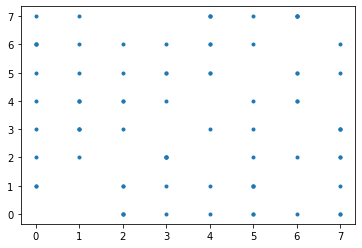

In [151]:
import matplotlib.pyplot as plt
plt.figure
plt.plot(seq, new,'.')

In [108]:
perm_order

(2, 3, 4, 0, 1)

In [104]:
inds

array([ 0,  5, 10, 15, 20])

In [105]:
vals

array([1., 3., 5., 7., 9.])

In [69]:
np.random.permutation(5)

array([0, 4, 1, 3, 2])

In [95]:
len(good_perms)

44

In [102]:
good_perms[np.random.choice(np.arange(len(good_perms)))]

(3.0, 5.0, 7.0, 9.0, 1.0)

In [86]:
all_perms

[(1.0, 3.0, 5.0, 7.0, 9.0),
 (1.0, 3.0, 5.0, 9.0, 7.0),
 (1.0, 3.0, 7.0, 5.0, 9.0),
 (1.0, 3.0, 7.0, 9.0, 5.0),
 (1.0, 3.0, 9.0, 5.0, 7.0),
 (1.0, 3.0, 9.0, 7.0, 5.0),
 (1.0, 5.0, 3.0, 7.0, 9.0),
 (1.0, 5.0, 3.0, 9.0, 7.0),
 (1.0, 5.0, 7.0, 3.0, 9.0),
 (1.0, 5.0, 7.0, 9.0, 3.0),
 (1.0, 5.0, 9.0, 3.0, 7.0),
 (1.0, 5.0, 9.0, 7.0, 3.0),
 (1.0, 7.0, 3.0, 5.0, 9.0),
 (1.0, 7.0, 3.0, 9.0, 5.0),
 (1.0, 7.0, 5.0, 3.0, 9.0),
 (1.0, 7.0, 5.0, 9.0, 3.0),
 (1.0, 7.0, 9.0, 3.0, 5.0),
 (1.0, 7.0, 9.0, 5.0, 3.0),
 (1.0, 9.0, 3.0, 5.0, 7.0),
 (1.0, 9.0, 3.0, 7.0, 5.0),
 (1.0, 9.0, 5.0, 3.0, 7.0),
 (1.0, 9.0, 5.0, 7.0, 3.0),
 (1.0, 9.0, 7.0, 3.0, 5.0),
 (1.0, 9.0, 7.0, 5.0, 3.0),
 (3.0, 1.0, 5.0, 7.0, 9.0),
 (3.0, 1.0, 5.0, 9.0, 7.0),
 (3.0, 1.0, 7.0, 5.0, 9.0),
 (3.0, 1.0, 7.0, 9.0, 5.0),
 (3.0, 1.0, 9.0, 5.0, 7.0),
 (3.0, 1.0, 9.0, 7.0, 5.0),
 (3.0, 5.0, 1.0, 7.0, 9.0),
 (3.0, 5.0, 1.0, 9.0, 7.0),
 (3.0, 5.0, 7.0, 1.0, 9.0),
 (3.0, 5.0, 7.0, 9.0, 1.0),
 (3.0, 5.0, 9.0, 1.0, 7.0),
 (3.0, 5.0, 9.0, 7.0

In [84]:
np.array(all_perms[0])!=unique_vals

array([False, False, False, False, False])

In [50]:
1000/2/10/2

25.0

In [48]:
np.sum(group)

25

In [98]:

def shuffle_nosame_repeats(sequence):
    
    """
    Shuffle a list pseudo-randomly, making sure that no element has the same 
    value in the new and old list.
    Need to have list where each value repeats an equal number of times (or once each).
    """
    unique_vals, uncounts = np.unique(sequence, return_counts=True)
    n_each = uncounts[0]
    n_vals = len(unique_vals)
    assert(np.all(uncounts==n_each))
    
    n_total = len(sequence)

    # list all the ways to randomly permute groups of elements without having any in 
    # their original position.
    all_perms = list(permutations(np.arange(n_vals)))
    good_perms = [perm for perm in all_perms if np.all(np.array(perm)!=(np.arange(n_vals)))]

    # sort to make it easy to find the common groups
    order2sort, order2reverse = invertible_sort(sequence)
    sorted_sequence = sequence[order2sort]

    new_sequence = np.zeros(np.shape(sorted_sequence),dtype=sorted_sequence.dtype)

    n_groups = n_each
    for gg in range(n_groups):
    
        # gather N elements at a time, one of each value. 
        inds = gg+np.arange(0,n_total,n_each)
        vals = sorted_sequence[inds]
        assert(np.all(vals==unique_vals))

        # pick at random one of the orders that works
        perm_order = np.array(good_perms[np.random.choice(np.arange(len(good_perms)))])
        new_sequence[inds] = vals[perm_order]

    new_sequence_unsorted = new_sequence[order2reverse]

    return new_sequence_unsorted


def invertible_sort(sequence):
    """
    Sort a sequence and store the order needed to reverse sort.
    Based on np.argsort.
    """
    order2sort = np.argsort(sequence)
    order2reverse = np.argsort(order2sort)
    
    return order2sort, order2reverse

def swap_rand_pairs(sequence):
    
    n = len(sequence)
    assert(np.mod(n, 2)==0)
    
    randpairs = np.floor(np.random.permutation(np.arange(n))/2).astype(int)
    new_sequence = np.zeros(np.shape(sequence),dtype=sequence.dtype)
    
    for ii in range(int(n/2)):
        
        pair_inds = randpairs==ii
        new_sequence[pair_inds] = np.flip(sequence[pair_inds])
        
    return new_sequence

In [43]:
np.sum(group)

5

In [40]:
n

NameError: name 'n' is not defined

In [6]:
# shuffle the order of everything together.
shuff_order = np.random.permutation(np.arange(n_trials_total))
trial_info = trial_info.iloc[shuff_order]

# finally, assign the run numbers for each trial (these are the only non-shuffled columns).
trial_info['run_number'] = np.repeat(np.arange(n_runs), n_trials_per_run) + 1
trial_info['trial_in_run'] = np.tile(np.arange(n_trials_per_run), [n_runs,]) + 1

# double check everything
print('checking trial info')
check_trial_info(trial_info)

In [6]:
# save everything to a single CSV file
expt_design_folder = os.path.join(project_root, 'expt_design', expt_name)
if not os.path.exists(expt_design_folder):
    os.makedirs(expt_design_folder)
trialinfo_filename1 =  os.path.join(expt_design_folder, 'trial_info_counterbal%d.csv'%(cb+1))
print('saving to %s'%trialinfo_filename1)
trial_info.to_csv(trialinfo_filename1, index=False)

# making .js files for use in jsPsych
# (this file holds all the runs)
js_filename = os.path.join(expt_design_folder, 'trialseq_counterbal%d.js'%(cb+1))

expt_utils.make_runs_js(trial_info, js_filename, var_name='info%d'%(cb+1))

    # return

NameError: name 'n_counterbalance_conds' is not defined

In [23]:
concepts_filename = os.path.join(things_root, 'concepts_use.npy')
concepts_use = np.load(concepts_filename,allow_pickle=True).item()
categ_names = concepts_use['categ_names']
concept_names = concepts_use['concept_names_subsample']
image_names = concepts_use['image_names']